<font size="+2">FINCRIME DATA SCIENCE CHALLENGE</font>

Data Dictionary:
1. **index** - Unique Identifier for each row
2. **trans_date_trans_time** - Transaction DateTime
3. **cc_num** - Credit Card Number of Customer
4. **merchant** - Merchant Name
5. **category** - Category of Merchant
6. **amt** - Amount of Transaction
7. **first** - First Name of Credit Card Holder
8. **last** - Last Name of Credit Card Holder
9. **gender** - Gender of Credit Card Holder
10. **street** - Street Address of Credit Card Holder
11. **city** - City of Credit Card Holder
12. **state** - State of Credit Card Holder
13. **zip** - Zip of Credit Card Holder
14. **lat** - Latitude Location of Credit Card Holder
15. **long** - Longitude Location of Credit Card Holder
16. **city_pop** - Credit Card Holder's City Population
17. **job** - Job of Credit Card Holder
18. **dob** - Date of Birth of Credit Card Holder
19. **trans_num** - Transaction Number
20. **unix_time** - UNIX Time of transaction
21. **merch_lat** - Latitude Location of Merchant
22. **merch_long** - Longitude Location of Merchant
23. **is_fraud** - Fraud Flag <--- Target Class {1: Fraud, 0: Non-Fraud}


<font size="+2">Problem Statement</font>

**Part 1: Analysing Customer Transactions**<br>
This involves training data (tr_fincrime_train.csv) exploration, while also finding interesting patterns and trends using visualizations some of which can be leveraged as immediate actionable items.

**Part 2: Fraud Detection**<br>
This part focuses on building a model that can predict a fraudulent transaction using training data to train the model and test data(tr_fincrime_test.csv) to check how well model performs on test data.<br>
Additionally, it requires providing inputs on what other dimensions could have been explored for further improvements, in terms of data and ML models.

# <font size="+2">Summary Report</font>

<font size="+2">Part1</font>

<font size="+0.5">**Observations**</font>:
1. It is observed that 75 cards in the training data had 100% fraud rate.
2. Transactions between 10 PM and 4 AM are more likely to be fraudulent.
3. We observe a visible pattern for transactions valuing greater than \\$200, which becomes more evident as the value increases(>\\$500).
4. Shopping net, Grocery pos and Misc net pos are more prone to fraudulent activities.
5. There seems to be significant fraud happening for customers older than 55 years.<br>

<font size="+0.5">**Actions**</font>:<br>
Based on the observations from the data, here are some actionable insights to counter fraud:<br>
1. **Rules-Based Monitoring**:<br>
    a. Flagging transactions occurring between 10 PM and 4 AM for additional scrutiny. This could involve requesting customer verification (e.g., SMS code) or temporarily blocking the card until confirmation is received.<br>
    b. Applying stronger authentication (e.g., 3D Secure) for transactions exceeding a certain threshold (e.g., \\$500).<br>
    c. Additionally, automatically declining transactions exceeding a higher threshold (e.g., \\$800) unless confirmed legitimate by the customer.<br>
    
2. **Suspicious Activity Monitoring**:<br>
    a. **Identify High Fraud Rate Cards**: Investigate cards with a 100% fraud rate in the training data. These cards might be compromised or issued fraudulently. Consider blocking them and issuing new cards to the legitimate holders.<br>
    b. **Monitor High-Risk Categories**: Paying close attention to transactions from categories with a higher than average fraud rate (Shopping net, Grocery pos, Misc net, Shopping pos). Analyzing these transactions for suspicious patterns.<br>
    c. **Velocity Checks**: Monitoring the frequency and value of transactions for individual cards. Sudden spikes in transaction volume or value, especially for online or international transactions, could indicate potential fraud. Implementing rules to flag such occurrences for reviews.<br>

3. **Customer-Based Initiatives**:<br>
    a. We observe a correlation between higher age groups and a greater likelihood of encountering fraudulent activity. In response, can develop targeted educational programs to inform and empower these demographics regarding prevalent fraud trends.

4. **Fraud Detection Model**:<br>
    a. Leveraging the observations and feature engineering to train a machine learning model to predict fraudulent transactions in real time. This model can be integrated into the payment processing system to automatically flag suspicious transactions for further investigation.<br>

<font size="+0.5">**Additional Considerations**</font>:<br>
    a.**Customer Communication**: Educating cardholders of all age groups about emerging fraud risks and encouraging them to promptly report any suspicious activity. Providing clear instructions on how to report a lost or stolen card.<br>
    b.**Regular Review and Updates**: Continuously monitoring fraud trends and updating our fraud detection strategy accordingly. Reviewing the effectiveness of implemented rules/models and refining them as needed.<br><br>
By implementing a combination of these actionable insights, we can significantly improve the ability to detect and prevent fraudulent transactions, protecting both the company and its customers. It's important to strike a balance between security and customer experience, ensuring a smooth and secure experience for legitimate cardholders.

<font size="+2">Part2</font>

<font size="+0.5">**Base Model Performance**</font>:<br>
Classification Report:
| Target | Precision| Recall | F1-Score | Support |
|---|---|---|---|---|
| Non Fraud | 1.00 | 0.99 | 0.99 | 386751 |
| Fraud     | 0.35 | 0.98 | 0.52 | 2252 |  386751

Confusion Matrix: 
|  | True Value| | |
|---|---|---|---|
|  |  |Non Fraud| Fraud |
|**Predicted**| Non Fraud | 382712 | 35 |
|**Value** |Fraud     | 4039 | 2217 |

 
1. **Fraud Precision (0.35)**: It shows the model misclassifies more than 50% of legitimate transactions as frauds(false positives) and thus requires further parameter tuning.<br>
2. **Fraud Recall (0.98)**: We have achieved a recall of 0.98 indicating the model might miss a very small percentage of fraudulent transactions and thus, predicting them as legitimate transactions (false negatives).<br>
3. **Specificity (0.99)**: With a specificity of 0.99, model is able to identify legitimate transactions and successfully avoided flagging them as fraudulent.

<font size="+0.5">**Hyperparameter Tuned Model Performance**</font>:<br>
Classification Report:
| Target | Precision| Recall | F1-Score | Support |
|---|---|---|---|---|
| Non Fraud | 1.00 | 1.00 | 1.00 | 386751 |
| Fraud     | 0.93 | 0.88 | 0.91 | 2252 |

Confusion Matrix:
|  | True Value| | |
|---|---|---|---|
|  |  |Non Fraud| Fraud |
|**Predicted**| Non Fraud | 386598 | 260 |
|**Value** |Fraud     | 153 | 1992 |


1. **Fraud Precision (0.93)**: The hyper-tuned model seems to perform exceptionally better than the base model in identifying fraudulent transactions and reducing false positives.<br>
2. **Fraud Recall (0.88)**: Though the recall has declined compared to base model, it still performs well in reducing the false negatives.<br>
3. **Specificity (1.00)**: With a specificity of 1.00, the model performs better, by avoiding classifying legitimate transactions as fraudulent.

<font size="+0.5">**Test Data Performance**</font>:<br>
Classification Report:
| Target | Precision| Recall | F1-Score | Support |
|---|---|---|---|---|
| Non Fraud | 1.00 | 1.00 | 1.00 | 553574 |
| Fraud     | 0.89 | 0.80 | 0.84 | 2145 |

Confusion Matrix:
|  | True Value| | |
|---|---|---|---|
|  |  |Non Fraud| Fraud |
|**Predicted**| Non Fraud | 553363 | 433 |
|**Value** |Fraud     | 211 | 1712 |


1. **Fraud Precision (0.89)**: Compared to training data, the model classifies a slightly higher percentage of legitimate transactions as frauds(false positives) on test data.<br>
2. **Fraud Recall (0.80)**: The model flags a slightly higher percentage of fraudulent transactions as legitimate(false negatives).<br>
3. **Specificity (1.00)**: The model performs similar on both training and test data when it comes to correctly identifying the legitimate transactions.

<font size="+0.5">**Key takeaways**</font>:
1. The hypertuned model performs well at identifying fraudulent transactions.
2. There's a trade-off between precision and recall for fraud detection. Tuning the model might be necessary to achieve the desired balance depending on the business needs.
3. The model generalizes well to unseen data.
4. It's important to monitor the model's performance over time as fraudsters adapt their tactics.


<font size="+0.5">**Further Possible Improvements**</font>:
1. **Feature Engineering Enhancement**:  Further exploration of feature engineering techniques could potentially improve the model's ability to identify fraudulent activity.<br>

2. **Enriched Customer Data**:  Obtaining additional customer information such as device details and IP addresses might provide valuable insights for uncovering potential fraud connections.<br>

3. **Merchant Risk Assessment**:  Gathering more information about merchants, particularly those with a higher risk of compromise, could strengthen our fraud detection strategy.<br>

4. **Hyperparameter Tuning Optimization**:  Access to greater computational resources would allow for a more comprehensive exploration of hyperparameter tuning options, potentially leading to a more finely-tuned and effective model.<br>

5. **Net Income-Based Model Evaluation**:  By incorporating fraud Gross Merchandise Value (GMV) into our model evaluation metrics, we can shift focus towards maximizing net income instead of solely relying on precision and recall. This can lead to a more business-centric approach to fraud detection.<br>
   Net Income = Total GMV* margin% -fraud gmv<br>


<font size="+0.5">**Appendix**</font>:<br>
Metrics Definitions:
1. **Precision** : It shows the percentage of predictions correctly made by the model. In the context of fraud, it means out of all the predictions made by the model, what percentage were actually fraud.
2. **Recall(Sensitivity)** : It shows the completeness of the model's positive predictions. In the context of fraud, it means what percentage of the actual frauds were correctly predicted by the model.
3. **Specificity** : It focuses on the correct identification of negative(genuine) cases. It tells you how good your model is at avoiding false positives, which are instances incorrectly classified as positive(fraud) when they belong to the negative(genuine) class.



# <font size="+2">Part 1: Analyse Customer Transactions - Implementation</font>

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import colorcet as cc # for label colors
import geopy.distance # for geo distances

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV

import shap

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
# For better display of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
# Loading Train and Test data
df1 = pd.read_csv("tr_fincrime_train.csv")
df2 = pd.read_csv("tr_fincrime_test.csv")

print('Shape of train data',df1.shape)
print('Shape of test data',df2.shape)

Shape of train data (1296675, 23)
Shape of test data (555719, 23)


In [4]:
# Merging two datasets for feature engineering before modeling
# Also creating indicator for filtering when required
full_data = pd.concat([df1.assign(source='train'), df2.assign(source='test')], ignore_index=True)

# Confirming count for both datasets
full_data['source'].value_counts()

source
train    1296675
test      555719
Name: count, dtype: int64

In [5]:
# Checking for missing data
percent_missing = round((full_data.isnull().sum() * 100 / len(full_data)),2)
missing_value_df = pd.DataFrame({'column_name': full_data.columns,
                                 'percent_missing': percent_missing})
if missing_value_df[missing_value_df['percent_missing']>0].isnull:
    print('\033[1m' + "No missing data" + '\033[0m')
else:
    missing_value_df[missing_value_df['percent_missing']>0]

No missing data


In [6]:
# Check first 5 rows for familiarising with the columns
full_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,source
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


In [7]:
# Column unnamed seems to be the index which is redundant, so we can safely drop this.
full_data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# Checking features and label type in the dataframe
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
 22  source            

There are in total 22 columns.<br>
**is_fraud** is the target(label) column.<br>
More than 50% of them are categorical.<br>
**trans_date_trans_time** and **dob** should be datetime.

In [9]:
# Check for class imbalance in each data
print('Target class distribution in train data:')
print(pd.DataFrame(full_data[full_data['source']=='train']['is_fraud'].value_counts(normalize=True)))
print('\n')
print('Target class distribution in test data:')
print(pd.DataFrame(full_data[full_data['source']=='test']['is_fraud'].value_counts(normalize=True)))

Target class distribution in train data:
          proportion
is_fraud            
0           0.994211
1           0.005789


Target class distribution in test data:
          proportion
is_fraud            
0            0.99614
1            0.00386


In [10]:
# validatig values in categorical data to check for text-errors
for c in ['category', 'merchant', 'city', 'state', 'job']:
    print("\033[1m"+ 'Categories for "{}" : {}'.format(c +"\033[0m", full_data[c].unique()))

Categories for "category" : ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
Categories for "merchant" : ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Ke

In [11]:
# We see some merchant categories have pos/net info
# Creating terminal type based on this info
import re
def pos_net(x):
    if re.search(r"(net)", x.lower()):
        return "net"
    elif re.search(r"(pos)", x.lower()):
        return "pos"
    else:
        return "others"

full_data['terminal_type'] = full_data['category'].apply(lambda x: pos_net(x))

In [12]:
# Converting trans_date_trans_time and dob to datetime and creating new features
full_data['trans_date_trans_time'] = pd.to_datetime(full_data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
full_data['dob'] = pd.to_datetime(full_data['dob'], format='%Y-%m-%d')

# Create features to check seasonality in the data
full_data['trxn_hour'] = full_data['trans_date_trans_time'].dt.hour                                # Transaction Hour
full_data['cust_age'] = full_data['trans_date_trans_time'].dt.year-full_data['dob'].dt.year        # Customer age at the time of transaction
full_data['is_weekend'] = full_data['trans_date_trans_time'].apply(lambda x:
                                                                   np.where(datetime.date.weekday(x)>4, 1, 0)) # Weekend Check

In [13]:
# Creating merchant_id and customer id for analysing merchant and customer level data
label_encoder = LabelEncoder()
full_data['merchant_id'] = label_encoder.fit_transform(full_data['merchant'])

# Temporary creating dob as string for generating customer ID
full_data['dob2'] = full_data['dob'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))

# Since customer names can be the same. Using customer birth date with first and last name to label customer id 
full_data['customer_id'] = label_encoder.fit_transform(full_data['first'] + full_data['last'] + full_data['dob2'])

# Renaming variables
full_data.rename(columns={'trans_num': 'trans_id'}, inplace=True)
full_data.rename(columns={'category': 'merchant_category'}, inplace=True)

# Dropping customer's first and last name as not relevant for analysis
full_data.drop(['first', 'last', 'dob2'], axis=1, inplace=True)

In [14]:
# Calculating distance between merchant and customer
geo_distance=[]
for x in range(len(full_data)):
    coords_1 = (full_data['lat'][x], full_data['long'][x])
    coords_2 = (full_data['merch_lat'][x], full_data['merch_long'][x])
    
    geo_distance.append(geopy.distance.geodesic(coords_1, coords_2).km)

full_data.insert(loc=len(full_data.columns), column='geo_distance', value=geo_distance)

# Dropping latitude and longitude for both merchants as customer since it's captured by geo-distance
full_data.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [15]:
# Checking unique categories for all the categorical features
for c in ['state','city','job','merchant','merchant_category']:
    print('Unique categories for feature {}: {}'.format(c, full_data[c].nunique()))

Unique categories for feature state: 51
Unique categories for feature city: 906
Unique categories for feature job: 497
Unique categories for feature merchant: 693
Unique categories for feature merchant_category: 14


## Exploratory Data Analysis

In [16]:
# Filtering train data for any visual trends
visual_data = full_data[full_data['source']=='train']

In [17]:
# Analysing the numeric features
visual_data[['amt','city_pop','cust_age','geo_distance']].describe()

,amt,city_pop,cust_age,geo_distance
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.602930e+01,7.611248e+01
std,1.603160e+02,3.019564e+05,1.738237e+01,2.909270e+01
min,1.000000e+00,2.300000e+01,1.400000e+01,2.227351e-02
25%,9.650000e+00,7.430000e+02,3.300000e+01,5.535784e+01
50%,4.752000e+01,2.456000e+03,4.400000e+01,7.826335e+01
75%,8.314000e+01,2.032800e+04,5.700000e+01,9.846835e+01
max,2.894890e+04,2.906700e+06,9.600000e+01,1.518682e+02


**Observation**<br>
We see a right-skewed distribution in amt feature, maybe due to high value fraud transactions.

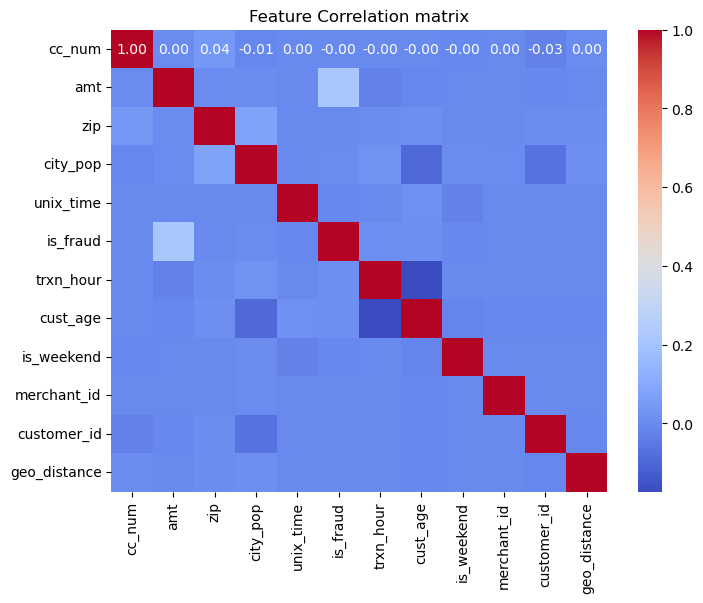

In [18]:
# Checking for any correlation between the numeric features
corr_data = visual_data.select_dtypes(include=np.number)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), cmap='coolwarm', annot=True, fmt=".2f",
            xticklabels=corr_data.columns, yticklabels=corr_data.columns)
plt.title('Feature Correlation matrix')
plt.show()

**Observation**<br>
We do not see any correlation between the numeric features.

In [19]:
# Checking unique credit card number and customer ID count
print("Total unique credit cards:", visual_data['cc_num'].nunique())
print("Total unique customers:", visual_data['customer_id'].nunique())

Total unique credit cards: 983
Total unique customers: 983


**Inference**: We can safely assume that each customer has unique credit cards

In [20]:
# Check fraud rates on credit cards
cc_data = visual_data.groupby('cc_num').agg(frd = ('is_fraud','sum'),
                                            cnt = ('is_fraud','count'),
                                            frd_rt= ('is_fraud','mean')).sort_values(by='frd_rt', ascending=False).reset_index()
cc_data.sort_values(by='frd_rt', ascending = False)

,cc_num,frd,cnt,frd_rt
0,4318414072191879,9,9,1.0
48,3524485462198080,11,11,1.0
55,3562793934111141,13,13,1.0
54,180040131978916,9,9,1.0
53,501818133297,8,8,1.0
...,...,...,...,...
837,30011465039817,0,501,0.0
838,4244953610136705533,0,516,0.0
839,4981132848794,0,1525,0.0
840,4755696071492,0,2591,0.0


**Observation**: There seems to be some cards/customers with 100% fraud rate.

In [21]:
# Checking the count for such cards
frd_cards = cc_data[cc_data['frd_rt']==1]['cc_num'].to_list()
print('\033[1m' + "Observation:\n"+ '\033[0m' +
      "There are {} cards with 100% fraud.".format(len(frd_cards)))

Observation:
There are 75 cards with 100% fraud.


In [22]:
# Checking if atleast 10% of such cards have a common location
visual_data[visual_data['cc_num'].isin 
(frd_cards)].groupby('state').agg(crd_cnt=('cc_num','nunique')).query('crd_cnt/75 >= 0.1')

,crd_cnt
state,
NY,10


**Inference**: Approximately 14% of these cards are from NY state.

In [23]:
#Creating amount and age bins for visualisation purposes
def amt_bin(x):
    if x<=100:
        return '1. 0-100'
    elif x>100 and x<=200:
        return '2. 101-200'
    elif x>200 and x<=500:
        return '3. 201-500'
    else:
        return '4. >500'

def age_bin(age):
    if age <= 18:
        return '1. <=18'
    elif age>18 and age<=35:
        return '2. 19-35'
    elif age>35 and age<=55:
        return '3. 36-55'
    else:
        return '4. >55'

visual_data['Amount_Bins'] = visual_data['amt'].apply(lambda x: amt_bin(x))
visual_data['Age_Group'] = visual_data['cust_age'].apply(lambda x: age_bin(x))

In [24]:
def trxn_frd_visual(data,group_var,index):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()  # Create a twin axis for the line plot

    data_summ = data.groupby(group_var).agg(trxn_count=('trans_id','count'),
                                    frd_cnt=('is_fraud','sum')).reset_index()
    # Plot the bar chart on the primary axis
    ax1.bar(data_summ[group_var], data_summ['trxn_count'], color='blue', label='Trxn Count')

    # Plot the line chart on the secondary axis
    ax2.plot(data_summ[group_var], data_summ['frd_cnt'], color='red', marker='o', linestyle='-', label='Fraud Count')

    # Set labels and title
    ax1.set_xlabel(group_var)
    ax1.set_ylabel('Transaction Count')
    ax2.set_ylabel('Fraud Count')
    plt.title('Visual {}:Transaction and Fraud Distribution by {}'.format(index, group_var.capitalize()))

    # Customize x-axis tick labels to avoid overlapping bars
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

    
    # Add legends for both plots
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

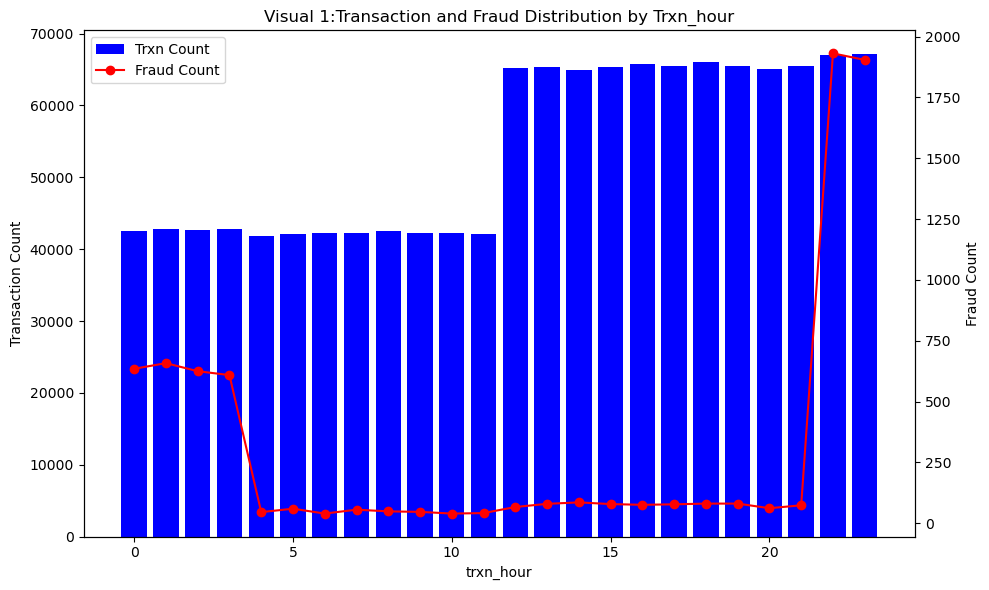

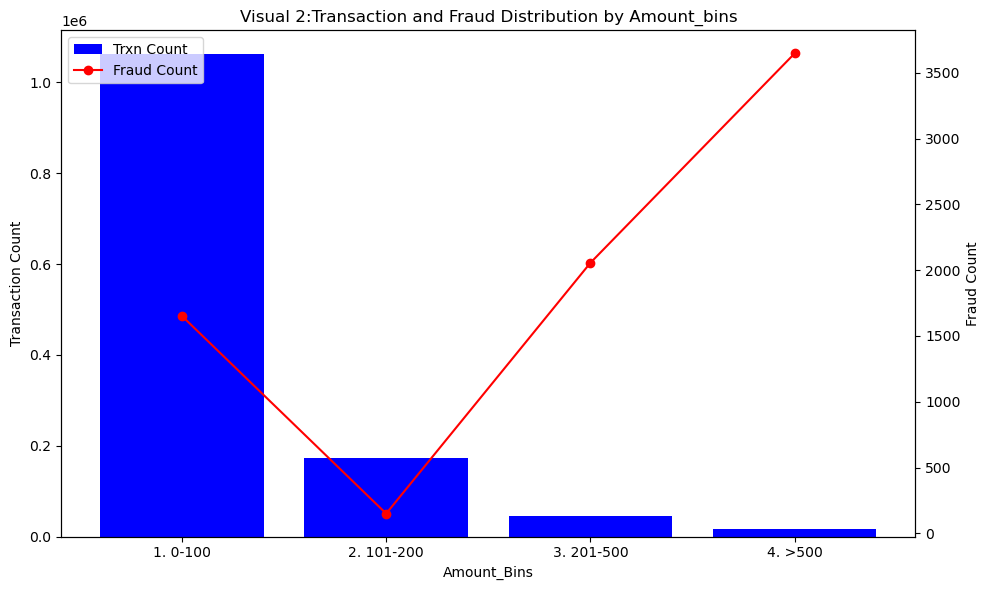

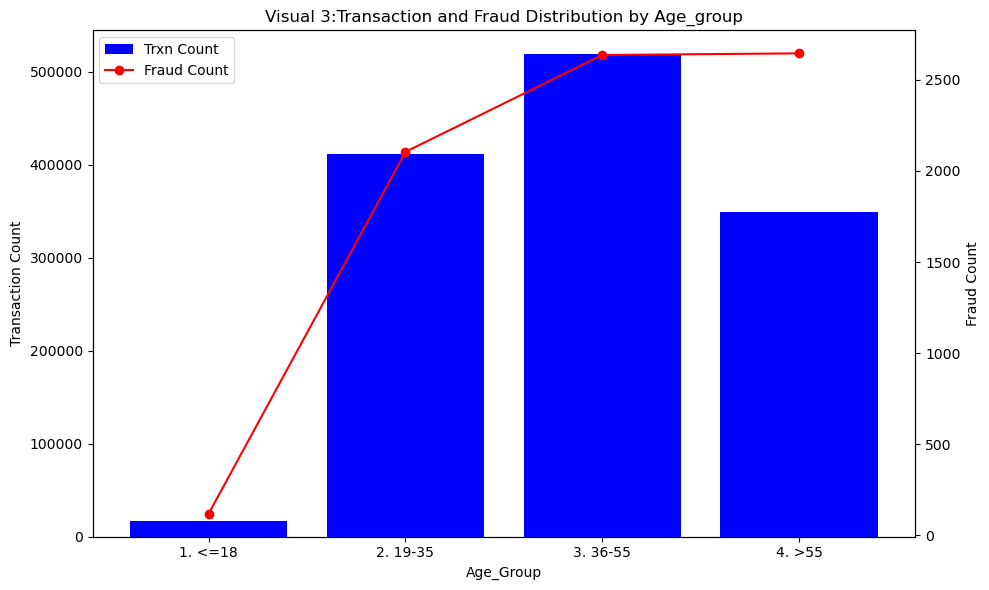

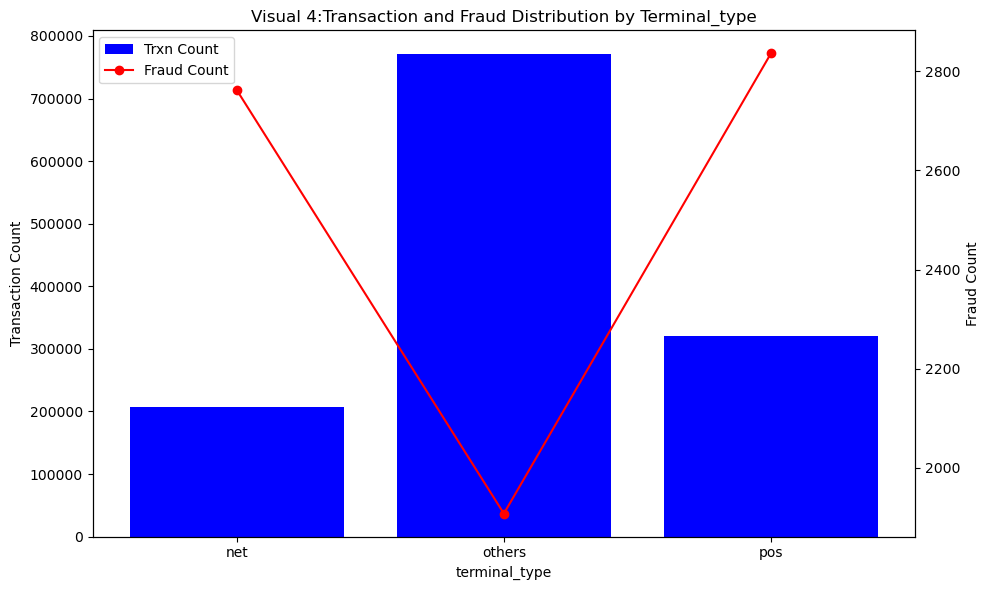

In [25]:
# Checking fraud patterns for hour, amount and age group
for i, var in enumerate(['trxn_hour', 'Amount_Bins', 'Age_Group', 'terminal_type']):
    trxn_frd_visual(visual_data, var, i+1)

**Observations**:<br>
**Visual 1**: Transaction volume is highest between business hours(12pm-10pm), but a significant portion of fraudulent activity concentrates during off-peak hours (10pm-4am) despite overall transaction volume being lower at that time.<br>
**Visual 2**: High-value transactions (>$200) might be outliers compared to the usual spending patterns.<br>
**Visual 3**: The data suggests a potential vulnerability among older age groups.<br>
**Visual 4**: Both POS (point-of-sale) and network transactions (Net) exhibit higher fraud rates compared to other methods. Notably, even though 'Net' transactions have a lower overall volume, they seem to be disproportionately affected by fraud.

In [26]:
# Creating bins for merchant distance from the customer
def geo_bins(distance):
    if distance <= 20:
        return '1. Nearby'
    elif distance>20 and distance<=55:
        return '2. Within City'
    elif distance>55 and distance<=98:
        return '3. City Outskirts '
    else:
        return '4. Far'

visual_data['Distance_Bin'] = visual_data['geo_distance'].apply(lambda x: geo_bins(x))

In [27]:
def category_plot(data,group_var,index):
    data = visual_data.groupby(group_var).agg(fraud_rate = ('is_fraud','mean'),
                                                       trxn_cnt = ('trans_id','count')).query('trxn_cnt>=30000').reset_index()
    data['fraud_rate'] = round(100*data['fraud_rate'],2)
    
    # Ensure numerical data types for x and y
    data['trxn_cnt'] = pd.to_numeric(data['trxn_cnt'])  # Handle potential errors during conversion
    data['fraud_rate'] = pd.to_numeric(data['fraud_rate'])
    
    plt.figure(figsize=(10, 6))
    
    palette = sns.color_palette(cc.glasbey, n_colors=len(data[group_var]))
    
    # Use seaborn lmplot with hue
    sns.lmplot( x='trxn_cnt', y='fraud_rate', data=data, fit_reg=False, hue=group_var, legend=True, palette=palette)

    # Set axis labels and title
    plt.xlabel('Transaction Count')
    plt.ylabel('Fraud Rate')
    plt.title('Visual {}:Transaction and Fraud Distribution by {}'.format(index, group_var.capitalize()))

    plt.grid(True)
    plt.show()

<Figure size 1000x600 with 0 Axes>

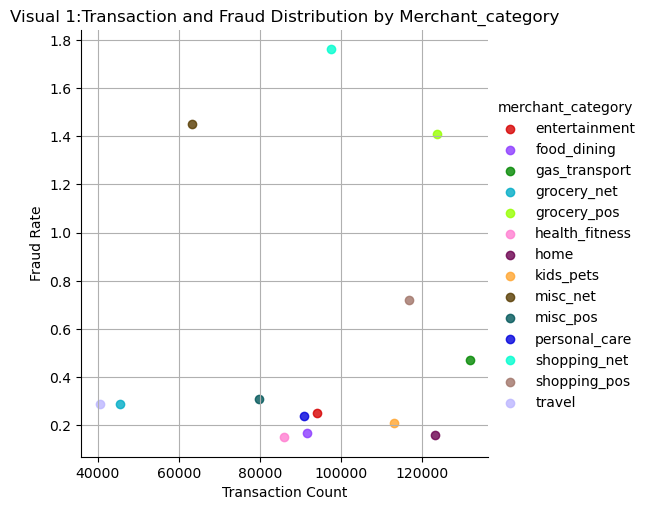

<Figure size 1000x600 with 0 Axes>

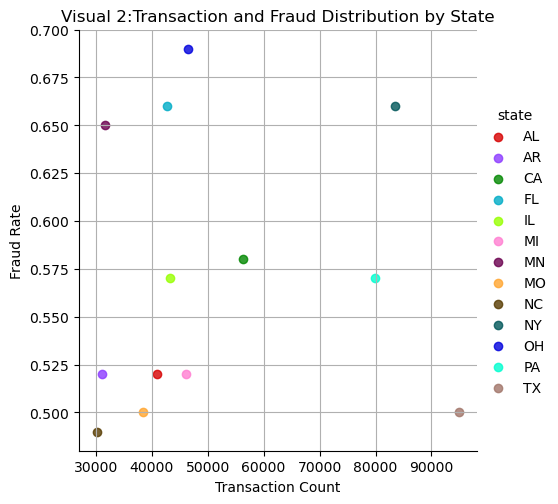

<Figure size 1000x600 with 0 Axes>

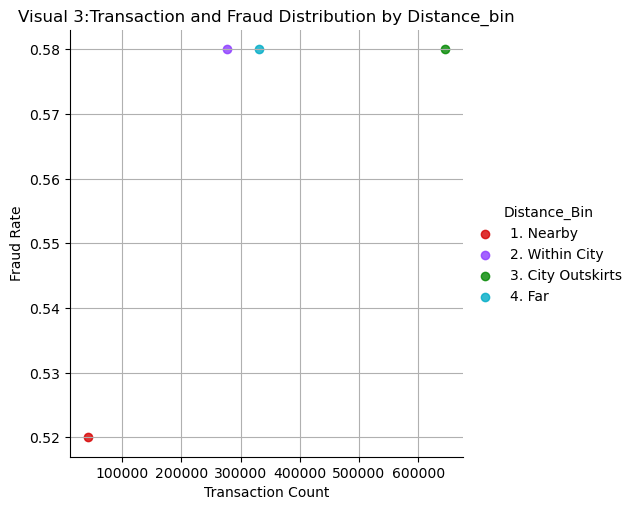

In [28]:
for i, var in enumerate(['merchant_category', 'state', 'Distance_Bin']):
    category_plot(visual_data, var, i+1)

**Observations**:<br>
**Visual 1**: Initial analysis reveals that certain merchant categories, such as "shopping_net," "misc_net," and "grocery_pos," exhibit a higher likelihood of fraudulent transactions compared to other categories, particularly when considering transactions exceeding 30,000.<br>
**Visual 2**: As can be seen, Ohio(OH), New York(NY), Florida(FL) and Minnesota(MN) have a higher percentage of fraudulent transactions. While North Carolina(NC), Missouri(MO) and Texas(TX) are amongst the states with lowest percentage of fraud activities amongst all the states with at least 30k transaction.<br>
**Visual 3**: We observe that customer distance from the merchant is not significant feature in identifying fraud.

# <font size="+2">Part 2: Fraud Detection - Implementation</font>

## Feature Engineering

Creating some frequency variables

In [29]:
# Creating Customer level features to identify out-of-pattern buying behaviour
full_data = full_data.sort_values(by='trans_date_trans_time')

full_data["cust_trxn_cnt_1d"] = full_data.groupby("customer_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("1d", on="trans_date_trans_time").count())["amt"].reset_index(level=0, drop=True)

full_data["cust_trxn_cnt_7d"] = full_data.groupby("customer_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("7d", on="trans_date_trans_time").count())["amt"].reset_index(level=0, drop=True)

full_data["cust_trxn_cnt_30d"] = full_data.groupby("customer_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("30d", on="trans_date_trans_time").count())["amt"].reset_index(level=0, drop=True)


full_data["cust_avg_spend_1d"] = full_data.groupby("customer_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("1d", on="trans_date_trans_time").mean())["amt"].reset_index(level=0, drop=True)

full_data["cust_avg_spend_7d"] = full_data.groupby("customer_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("7d", on="trans_date_trans_time").mean())["amt"].reset_index(level=0, drop=True)

full_data["cust_avg_spend_30d"] = full_data.groupby("customer_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("30d", on="trans_date_trans_time").mean())["amt"].reset_index(level=0, drop=True)

In [30]:
# Creating Merchant level features to identify if the merchant terminal is compromised

full_data["merch_trxn_cnt_1d"] = full_data.groupby("merchant_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("1d", on="trans_date_trans_time").count())["amt"].reset_index(level=0, drop=True)

full_data["merch_trxn_cnt_7d"] = full_data.groupby("merchant_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("7d", on="trans_date_trans_time").count())["amt"].reset_index(level=0, drop=True)

full_data["merch_trxn_cnt_30d"] = full_data.groupby("merchant_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("30d", on="trans_date_trans_time").count())["amt"].reset_index(level=0, drop=True)


full_data["merch_avg_buy_1d"] = full_data.groupby("merchant_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("1d", on="trans_date_trans_time").mean())["amt"].reset_index(level=0, drop=True)

full_data["merch_avg_buy_7d"] = full_data.groupby("merchant_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("7d", on="trans_date_trans_time").mean())["amt"].reset_index(level=0, drop=True)

full_data["merch_avg_buy_30d"] = full_data.groupby("merchant_id", as_index=False).apply(
    lambda x: x[["trans_date_trans_time", "amt"]].rolling("30d", on="trans_date_trans_time").mean())["amt"].reset_index(level=0, drop=True)


In [31]:
# Computing RFM features for each customer to capture unusual spikes based on 
# Recency, Frequency and Monetary value of transactions

def compute_rfm(rfm_df, transaction_date_col, customer_id_col, amount_col):
  """
  This function computes RFM (Recency, Frequency, Monetary) variables for each customer
  at the time of the transaction.
  """

  # Sort data by customer ID and transaction date (descending order)
  rfm_df = rfm_df.sort_values(by=[customer_id_col, transaction_date_col], ascending=[True, False])

  # Calculate Recency - Days since last transaction (assuming daily data)
  rfm_df['days_since_last_transaction'] = rfm_df.groupby(customer_id_col)[transaction_date_col].diff(periods=1)
  rfm_df['days_since_last_transaction'].fillna(rfm_df[transaction_date_col].max() - rfm_df.groupby(customer_id_col)[transaction_date_col].transform('min'), inplace=True)
  rfm_df['days_since_last_transaction'] = rfm_df['days_since_last_transaction'].dt.days

  # Calculate Frequency - Rolling count of transactions per customer (window size of 1)
  rfm_df['trxn_frequency'] = rfm_df.groupby(customer_id_col)[transaction_date_col].transform('size')

  # Calculate Monetary - Rolling sum of transaction amounts per customer (window size of 1)
  rfm_df['trxn_monetary'] = rfm_df.groupby(customer_id_col)[amount_col].transform('sum')

  return rfm_df

full_data = compute_rfm(full_data, 'trans_date_trans_time', 'customer_id', 'amt')

## Model Building

In [57]:
# Filtering train and test data for building model
model_train = full_data[full_data['source']=='train']
model_test = full_data[full_data['source']=='test']

In [58]:
# Checking if test data is for out-of-time validation
days_diff = (model_test['trans_date_trans_time'].min() - model_train['trans_date_trans_time'].max()).total_seconds()

print("\033[1m" + "Inference" + "\033[0m")
if days_diff > 0:
    print("Test data seems to be for out-of-time validation")
else:
    print("Test data seems suitable for current time validation")

Inference
Test data seems to be for out-of-time validation


In [59]:
# Checking columns for removing unwanted features
model_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'merchant_category',
       'amt', 'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'job',
       'dob', 'trans_id', 'unix_time', 'is_fraud', 'source', 'terminal_type',
       'trxn_hour', 'cust_age', 'is_weekend', 'merchant_id', 'customer_id',
       'geo_distance', 'cust_trxn_cnt_1d', 'cust_trxn_cnt_7d',
       'cust_trxn_cnt_30d', 'cust_avg_spend_1d', 'cust_avg_spend_7d',
       'cust_avg_spend_30d', 'merch_trxn_cnt_1d', 'merch_trxn_cnt_7d',
       'merch_trxn_cnt_30d', 'merch_avg_buy_1d', 'merch_avg_buy_7d',
       'merch_avg_buy_30d', 'days_since_last_transaction', 'trxn_frequency',
       'trxn_monetary'],
      dtype='object')

In [60]:
cols_to_drop = ['trans_date_trans_time', 'cc_num', 'street', 'dob', 'trans_id',
                'unix_time', 'source', 'merchant_id', 'customer_id', 'cust_age', 'gender'] #removing age and gender due to US regulations

In [61]:
train_Features = model_train.drop(cols_to_drop, axis=1)

In [62]:
# checking value counts in categorical features of train data
for c in train_Features.select_dtypes('object').columns.to_list():
    print(c,':',train_Features[c].nunique())

merchant : 693
merchant_category : 14
city : 894
state : 51
job : 494
terminal_type : 3


In [63]:
# Storing categories of categorical features to match with test data 
train_merch = train_Features['merchant'].to_list()
train_cat = train_Features['merchant_category'].to_list()
train_city = train_Features['city'].to_list()
train_state = train_Features['state'].to_list()
train_job = train_Features['job'].to_list()

In [64]:
print("Merchant name different in Test data:", model_test[~model_test['merchant'].isin(train_Features['merchant'].to_list())]['merchant'].nunique())
print("Merchant categories different in Test data:", model_test[~model_test['merchant_category'].isin(train_Features['merchant_category'].to_list())]['merchant_category'].nunique())
print("Cities different in Test data:", model_test[~model_test['city'].isin(train_Features['city'].to_list())]['city'].nunique())
print("States different in Test data:", model_test[~model_test['state'].isin(train_Features['state'].to_list())]['state'].nunique())
print("Job categories different in Test data:", model_test[~model_test['job'].isin(train_Features['job'].to_list())]['job'].nunique())

Merchant name different in Test data: 0
Merchant categories different in Test data: 0
Cities different in Test data: 12
States different in Test data: 0
Job categories different in Test data: 3


**Inference**:
1. Because we have a lot of "text-like" features (categorical features), a tree-based algorithm might work well for this problem.
2. We noticed that some categories exist in the test data that weren't present in the training data. This could cause issues for some models.
3. Using XGBoost (a popular tree-based model) might not be ideal in this case. One reason is that a technique called "target mean encoding" wouldn't work well here. This technique involves replacing missing categories with a default value, but that might not be appropriate when dealing with unseen categories.
4. Therefore, we'll use a CatBoost model instead. This model is specifically designed to handle categorical features effectively, even when there are unseen categories in the test data.

In [65]:
# Split the data into train and test sets
Train_Data, Test_Data, y_train, y_test = train_test_split(train_Features, train_Features['is_fraud'], test_size=0.3, stratify= train_Features['is_fraud'])

In [66]:
# Removing the labels from train and test features
Train_Data = Train_Data.drop('is_fraud',axis=1)
Test_Data = Test_Data.drop('is_fraud',axis=1)

In [68]:
# Defining categorical features
categorical_features = Train_Data.select_dtypes('object').columns.to_list()

# Creating a CatBoost Pool for training data
train_pool = Pool(
    data=Train_Data,
    label=y_train,
    cat_features=categorical_features,  # Specify categorical features if applicable
)

# Defining CatBoost Classifier
model = CatBoostClassifier(cat_features=categorical_features, auto_class_weights='Balanced', depth=3, l2_leaf_reg= 50, random_state=42)

# Training the CatBoost model
model.fit(train_pool)

# Making predictions on test data
predictions = model.predict(Test_Data)

0:	learn: 0.6547609	total: 266ms	remaining: 4m 25s
1:	learn: 0.6176909	total: 478ms	remaining: 3m 58s
2:	learn: 0.5834053	total: 705ms	remaining: 3m 54s
3:	learn: 0.5485851	total: 933ms	remaining: 3m 52s
4:	learn: 0.5183349	total: 1.12s	remaining: 3m 42s
5:	learn: 0.4979906	total: 1.27s	remaining: 3m 31s
6:	learn: 0.4691703	total: 1.48s	remaining: 3m 29s
7:	learn: 0.4448556	total: 1.67s	remaining: 3m 26s
8:	learn: 0.4231616	total: 1.86s	remaining: 3m 24s
9:	learn: 0.4038240	total: 2.16s	remaining: 3m 34s
10:	learn: 0.3842686	total: 2.34s	remaining: 3m 30s
11:	learn: 0.3681025	total: 2.51s	remaining: 3m 26s
12:	learn: 0.3553458	total: 2.71s	remaining: 3m 26s
13:	learn: 0.3406625	total: 2.91s	remaining: 3m 25s
14:	learn: 0.3280901	total: 3.1s	remaining: 3m 23s
15:	learn: 0.3159554	total: 3.29s	remaining: 3m 22s
16:	learn: 0.3071748	total: 3.47s	remaining: 3m 20s
17:	learn: 0.2971326	total: 3.66s	remaining: 3m 19s
18:	learn: 0.2864004	total: 3.81s	remaining: 3m 16s
19:	learn: 0.2770093	to

In [69]:
print("\033[1m" + "Classification Report:\n" + "\033[0m", classification_report(y_test, predictions))
print("\033[1m" + "Confusion Matrix:\n" + "\033[0m", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    386751
           1       0.35      0.98      0.52      2252

    accuracy                           0.99    389003
   macro avg       0.68      0.99      0.76    389003
weighted avg       1.00      0.99      0.99    389003

Confusion Matrix:
 [[382712   4039]
 [    35   2217]]


## Hyperparameter tuning

Using grid search to find best parameters

In [ ]:
# Define categorical features
categorical_features = Train_Data.select_dtypes('object').columns.to_list()

# Create a CatBoost Pool for training data
train_pool = Pool(
    data=Train_Data,
    label=y_train,
    cat_features=categorical_features,  # Specify categorical features if applicable
)

# Define the parameter grid for CatBoost
params = {
    # search params
        'l2_leaf_reg': [50],
        'iterations' : [700, 1000],
        'learning_rate': [0.02, 0.05],
        'depth': [3],
        'auto_class_weights': ['None','Balanced'],
        'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
}

# Create CatBoost model classifier
cat_clf = CatBoostClassifier(cat_features=categorical_features,random_state=42)

# Create GridSearchCV instance
cat_gscv = GridSearchCV(cat_clf, param_grid=params, cv=2, verbose=2.5,)

# Fit the grid search to the data
cat_gscv.fit(Train_Data,y_train,cat_features = categorical_features)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
0:	learn: 0.6432149	total: 128ms	remaining: 1m 29s
1:	learn: 0.5801216	total: 221ms	remaining: 1m 17s
2:	learn: 0.5252693	total: 330ms	remaining: 1m 16s
3:	learn: 0.4746259	total: 441ms	remaining: 1m 16s
4:	learn: 0.4326706	total: 545ms	remaining: 1m 15s
5:	learn: 0.3944060	total: 660ms	remaining: 1m 16s
6:	learn: 0.3561567	total: 761ms	remaining: 1m 15s
7:	learn: 0.3266576	total: 857ms	remaining: 1m 14s
8:	learn: 0.3046274	total: 966ms	remaining: 1m 14s
9:	learn: 0.2766003	total: 1.06s	remaining: 1m 13s
10:	learn: 0.2577970	total: 1.16s	remaining: 1m 12s
11:	learn: 0.2362127	total: 1.26s	remaining: 1m 12s
12:	learn: 0.2159304	total: 1.35s	remaining: 1m 11s
13:	learn: 0.1986190	total: 1.45s	remaining: 1m 11s
14:	learn: 0.1824880	total: 1.61s	remaining: 1m 13s
15:	learn: 0.1677418	total: 1.72s	remaining: 1m 13s
16:	learn: 0.1575346	total: 1.82s	remaining: 1m 13s
17:	learn: 0.1453573	total: 1.92s	remaining: 1m 12s
18:	learn: 0.

In [71]:
# Get the best parameters
best_cat_params = cat_gscv.best_params_
print('\033[1m' + "Best CatBoost Parameters:" + '\033[0m', best_cat_params)

Best CatBoost Parameters: {'auto_class_weights': 'None', 'depth': 3, 'grow_policy': 'SymmetricTree', 'iterations': 1000, 'l2_leaf_reg': 50, 'learning_rate': 0.05}


## Creating new model using best params

In [72]:
# Use the best parameters to create the final Catboost model
final_cat = CatBoostClassifier(random_state=42, **best_cat_params)

# Train the model with the best parameters
final_cat.fit(Train_Data,y_train,cat_features = categorical_features)

# Make predictions on the validation set
cat_predictions = final_cat.predict(Test_Data)

0:	learn: 0.5383787	total: 221ms	remaining: 3m 41s
1:	learn: 0.4193313	total: 440ms	remaining: 3m 39s
2:	learn: 0.3495087	total: 668ms	remaining: 3m 42s
3:	learn: 0.2759562	total: 853ms	remaining: 3m 32s
4:	learn: 0.2241749	total: 1.05s	remaining: 3m 28s
5:	learn: 0.1757373	total: 1.24s	remaining: 3m 25s
6:	learn: 0.1431650	total: 1.42s	remaining: 3m 21s
7:	learn: 0.1174272	total: 1.6s	remaining: 3m 18s
8:	learn: 0.0993582	total: 1.8s	remaining: 3m 17s
9:	learn: 0.0845044	total: 1.98s	remaining: 3m 16s
10:	learn: 0.0714313	total: 2.18s	remaining: 3m 16s
11:	learn: 0.0612888	total: 2.36s	remaining: 3m 14s
12:	learn: 0.0527981	total: 2.54s	remaining: 3m 12s
13:	learn: 0.0464264	total: 2.71s	remaining: 3m 11s
14:	learn: 0.0404285	total: 2.9s	remaining: 3m 10s
15:	learn: 0.0363274	total: 3.08s	remaining: 3m 9s
16:	learn: 0.0323067	total: 3.25s	remaining: 3m 8s
17:	learn: 0.0286312	total: 3.44s	remaining: 3m 7s
18:	learn: 0.0262556	total: 3.61s	remaining: 3m 6s
19:	learn: 0.0238082	total: 3

In [74]:
# Model Evaluation on the validation data
print('\033[1m' + "CatBoost Results:" + '\033[0m')
print("Classification Report:\n", classification_report(y_test, cat_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, cat_predictions))

CatBoost Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.94      0.87      0.90      2252

    accuracy                           1.00    389003
   macro avg       0.97      0.93      0.95    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix:
 [[386634    117]
 [   298   1954]]


## Shap Summary plot

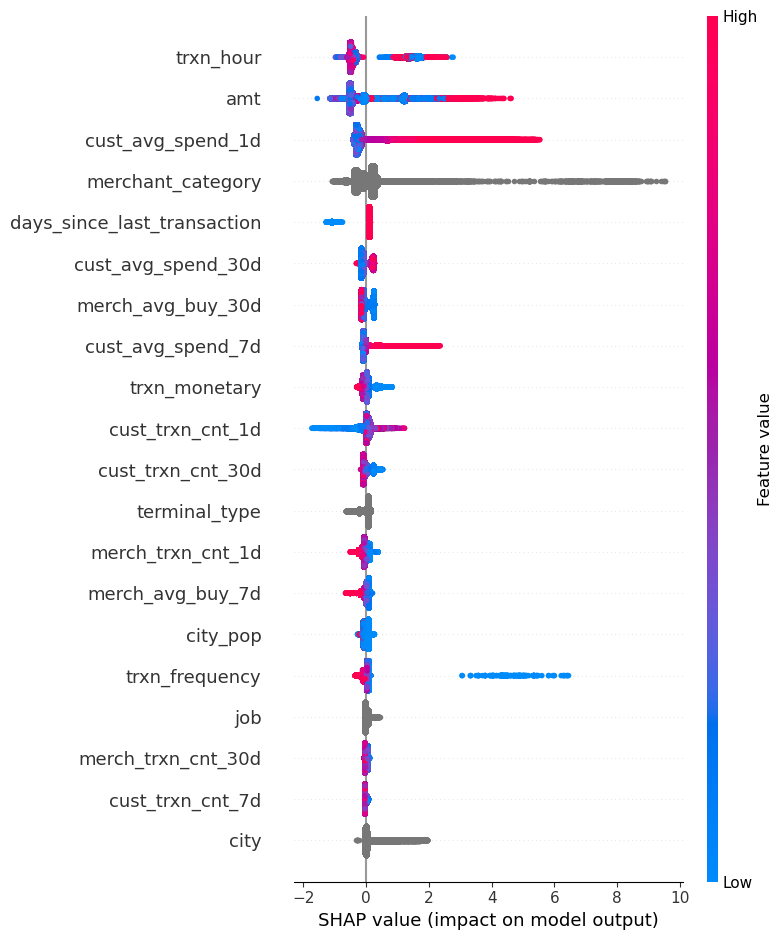

In [75]:
explainer = shap.TreeExplainer(final_cat)  # Create an explainer object using the best trained model
shap_values = explainer(Test_Data)  # Generate SHAP values for the test data

# Create SHAP summary plot
shap.summary_plot(shap_values, Test_Data)  # Display the SHAP summary plot

**Our fraud detection model is providing valuable insights:**:<br>
1. SHAP analysis confirms our initial observations about factors contributing to fraud.
2. The model effectively identifies periods with high fraud rates. This can help us focus resources on these critical timeframes to prevent fraud attempts.
3. Transaction amount is a significant indicator. As expected, high-value transactions are more likely to be flagged as fraudulent.
4. Recent customer spending patterns are informative. Customers with a sudden increase in spending in the past day might warrant closer scrutiny.
5. Merchant category plays a role. Different merchant types seem to have varying fraud risks. We can leverage this information to implement targeted fraud prevention strategies.
6. Customer inactivity is a potential red flag. Customers who haven't made recent purchases could be more susceptible to fraudulent activity on their accounts.

## Feature Importance

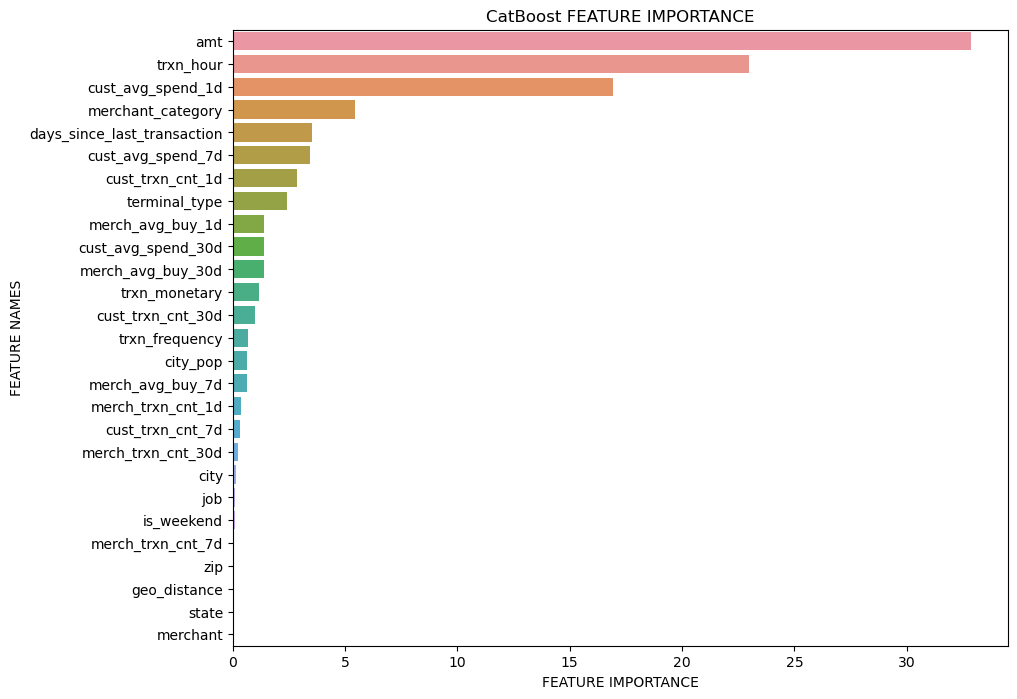

In [76]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(final_cat.feature_importances_,Train_Data.columns,'CatBoost')

## Finding best model threshold

In [77]:
y_prob=final_cat.predict_proba(Test_Data)[::,1]
for i in range(5,95,5):
    th=i/100
    print("Testing for threshold ",th)
    #rounding the values
    y_pred=np.where(y_prob>th,1,0)
    #converting from float to integer
    y_pred=y_pred.astype(int)

    print("AUC",metrics.roc_auc_score(y_test, y_pred))
    print("Precision",metrics.precision_score(y_test, y_pred))
    print("Recall",metrics.recall_score(y_test, y_pred))
    print("F1",metrics.f1_score(y_test, y_pred))
    print('*************')


Testing for threshold  0.05
AUC 0.9759391168894
Precision 0.6627620221948212
Recall 0.9547069271758437
F1 0.7823871906841339
*************
Testing for threshold  0.1
AUC 0.9696484582566521
Precision 0.7691470054446461
Recall 0.9409413854351687
F1 0.8464150189734372
*************
Testing for threshold  0.15
AUC 0.9636851549966426
Precision 0.8261556696957725
Recall 0.9285079928952042
F1 0.8743466443654611
*************
Testing for threshold  0.2
AUC 0.9593648900585303
Precision 0.8564929693961952
Recall 0.9196269982238011
F1 0.8869379014989294
*************
Testing for threshold  0.25
AUC 0.9545682548498613
Precision 0.8801546391752577
Recall 0.9098579040852576
F1 0.894759825327511
*************
Testing for threshold  0.3
AUC 0.9515245477888428
Precision 0.898851590106007
Recall 0.9036412078152753
F1 0.9012400354295836
*************
Testing for threshold  0.35
AUC 0.946909859981096
Precision 0.9129646418857661
Recall 0.894316163410302
F1 0.9035441902198296
*************
Testing for thre

Threshold of 0.4 is giving the best balance between precision and recall

## Generating final model performance report with best threshold 0.4

In [78]:
# Final model performance with best threshold of 0.4
model_output_prob=final_cat.predict_proba(Test_Data)[::,1]
model_output=np.where(model_output_prob>0.4,1,0)
#converting from float to integer
model_output=model_output.astype(int)

# Model Evaluation on the test data
print('\033[1m' + "CatBoost Final Trained Model Results:" + '\033[0m')
print("AUC",metrics.roc_auc_score(y_test, model_output),"\n")
print("Classification Report:\n", classification_report(y_test, model_output))
print("Confusion Matrix:\n", confusion_matrix(y_test, model_output))

CatBoost Final Trained Model Results:
AUC 0.942075732949523 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.93      0.88      0.91      2252

    accuracy                           1.00    389003
   macro avg       0.96      0.94      0.95    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix:
 [[386598    153]
 [   260   1992]]


## Scoring on given test data

In [79]:
# Split test data into features and labels
Test_Cat_Features = model_test.drop(cols_to_drop,axis=1)
Test_Cat_Features = Test_Cat_Features.drop('is_fraud', axis=1) # dropping the label feature from train data
Test_Cat_Labels = model_test['is_fraud']

In [80]:
# using best threshold of 0.4
model_output_prob=final_cat.predict_proba(Test_Cat_Features)[::,1]
model_output=np.where(model_output_prob>0.4,1,0)
#converting from float to integer
model_output=model_output.astype(int)

# Model Evaluation on the test data
print('\033[1m' + "CatBoost Test Data Results:" + '\033[0m')
print("AUC",metrics.roc_auc_score(Test_Cat_Labels, model_output),"\n")
print("Classification Report:\n", classification_report(Test_Cat_Labels, model_output))
print("Confusion Matrix:\n", confusion_matrix(Test_Cat_Labels, model_output))

CatBoost Test Data Results:
AUC 0.8988770193077116 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.89      0.80      0.84      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.90      0.92    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
 [[553363    211]
 [   433   1712]]


# ****************************** End of Assignment ******************************